In [1]:
import os
import opyplus as op
epw_files = os.listdir("data")
weather_dfs = []
for file in epw_files:
    # load weather data object
    try:
        weather_data = op.WeatherData.from_epw(os.path.join("data", file))
        weather_dfs.append(weather_data.get_weather_series())
    except Exception as e:
        print(e)

unknown encoding: VISCII
unknown encoding: VISCII
unknown encoding: VISCII


In [2]:
import pandas as pd
big_df = pd.concat(weather_dfs)
variables = ['drybulb', 'relhum', "winddir", "dirnorrad", "difhorrad", "windspd", "precip_wtr", "snowdepth"]
big_df = big_df[variables]

In [3]:
big_df.shape

(12754608, 6)

In [10]:
from sklearn.decomposition import IncrementalPCA
pca6 = IncrementalPCA(len(variables))
pca6.fit(big_df)

IncrementalPCA(n_components=6)

In [6]:
pca.__dict__.keys()

dict_keys(['n_components', 'whiten', 'copy', 'batch_size', 'components_', 'n_samples_seen_', 'mean_', 'var_', 'singular_values_', 'explained_variance_', 'explained_variance_ratio_', 'noise_variance_', 'feature_names_in_', 'n_features_in_', 'batch_size_', 'n_components_'])

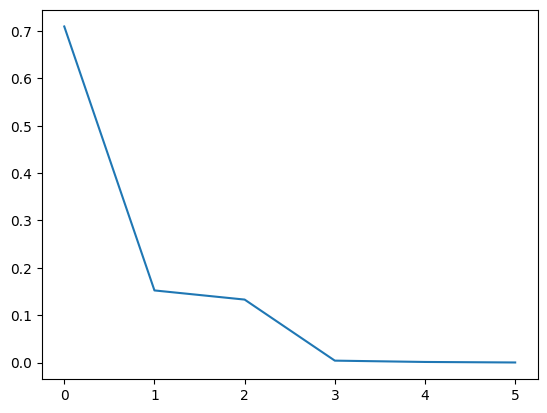

In [13]:
import matplotlib.pyplot as plt
plt.plot(pca6.explained_variance_ratio_)

In [16]:
sum(pca6.explained_variance_ratio_[:2])

0.8619201594865702

In [2]:
from requests_html import HTMLSession

session = HTMLSession()
URL = "https://energyplus.net/weather"
r = session.get(URL)

In [4]:
import asyncio
if asyncio.get_event_loop().is_running(): # Only patch if needed (i.e. running in Notebook, Spyder, etc)
    import nest_asyncio
    nest_asyncio.apply()
r.html.render()

RuntimeError: Cannot use HTMLSession within an existing event loop. Use AsyncHTMLSession instead.